In [7]:
import torch
import numpy

import matplotlib.pyplot as plt

plt.style.use('default')

file_path = 'res/mnist_algo_1/alpha_0.7_T_1/server_commu_50_client_commu_10_client_train_5_batch_size_200_num_all_client_9_num_all_server_3_num_client_data_1200_num_public_data_50_proportion_0.8.pt'
data = torch.load(file_path)

print(data.keys())

dict_keys(['args', 'server_model', 'server_acc', 'client_model', 'client_acc', 'train_acc', 'client_loss'])


4950
[0.10090452432632446, 0.10090452432632446, 0.10090452432632446, 0.10090452432632446, 0.10090452432632446, 0.10090452432632446, 0.10090452432632446, 0.10090452432632446, 0.10090452432632446, 0.10090452432632446, 0.10090452432632446, 0.10090452432632446, 0.10090452432632446, 0.10090452432632446, 0.10090452432632446, 0.10090452432632446, 0.10110552608966827, 0.10864321142435074, 0.13577888906002045, 0.17748743295669556, 0.21728642284870148, 0.2671356797218323, 0.3109547793865204, 0.3489447236061096, 0.3692462146282196, 0.39346733689308167, 0.46542713046073914, 0.46542713046073914, 0.5594974756240845, 0.5572864413261414, 0.48653265833854675, 0.543919563293457, 0.5715577602386475, 0.5833165645599365, 0.5774874091148376, 0.644321620464325, 0.6348743438720703, 0.6504522562026978, 0.6531658172607422, 0.601809024810791, 0.6840201020240784, 0.6943718791007996, 0.7251256108283997, 0.6929647922515869, 0.6918593049049377, 0.733668327331543, 0.7332663536071777, 0.7516582608222961, 0.74552762508

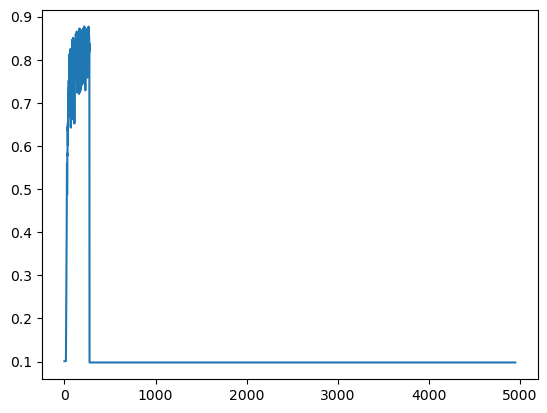

In [9]:
client_acc = data['client_acc']
print(len(client_acc[0]))
num_line = len(client_acc[0])
x = numpy.arange(num_line)
for i in x[:1]:
    y = numpy.array(client_acc[i])
    plt.plot(x, y)
print(list(y))
plt.show()

In [26]:
client_loss = data['client_loss']
num_line = len(client_loss[0])
x = numpy.arange(num_line)
print(len(client_loss[0]), num_line, len(x))
for i in range(len(client_loss)):
    print(i,client_loss[i])
    y = numpy.array(client_loss[i])
    plt.plot(x, y)
# print(y)
# idx = numpy.where(y < 0)
# print(idx)
plt.show()

14950 14950 14950
0 [2.2829113006591797, 2.2571144104003906, 2.2469000816345215, 2.223668336868286, 2.2129263877868652, 2.200592279434204, 2.1754581928253174, 2.172043561935425, 2.156193256378174, 2.133305549621582, 2.1089065074920654, 2.0874342918395996, 2.065950393676758, 2.064471483230591, 2.02458119392395, 1.9861351251602173, 1.9578860998153687, 1.9422270059585571, 1.9019229412078857, 1.900435209274292, 1.881289005279541, 1.8189953565597534, 1.7539143562316895, 1.6780195236206055, 1.6039338111877441, 1.609317421913147, 1.6334021091461182, 1.495940089225769, 1.4819217920303345, 1.4184510707855225, 1.4724351167678833, 1.2308238744735718, 1.2126317024230957, 1.227910041809082, 1.1222742795944214, 1.011523723602295, 1.0460162162780762, 1.2531241178512573, 1.0531642436981201, 0.8880040049552917, 1.0135685205459595, 1.2218687534332275, 0.8743027448654175, 1.0186556577682495, 0.8376126289367676, 0.9424630999565125, 0.9764475226402283, 0.9026613831520081, 0.9210885763168335, 1.139592528343

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (14950,) + inhomogeneous part.

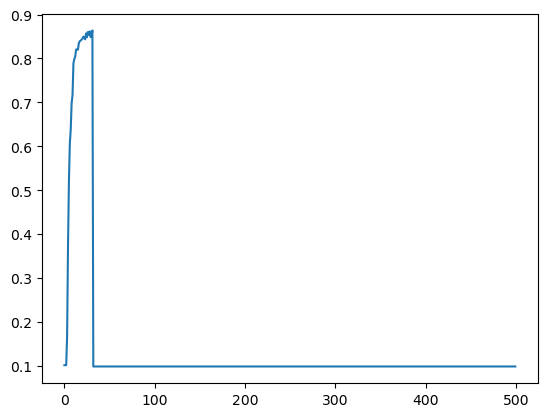

In [28]:
server_acc = data['server_acc']
num_line = len(server_acc[0])
x = numpy.arange(num_line)
for i in x[:1]:
    y = numpy.array(server_acc[i])
    plt.plot(x, y)

plt.show()

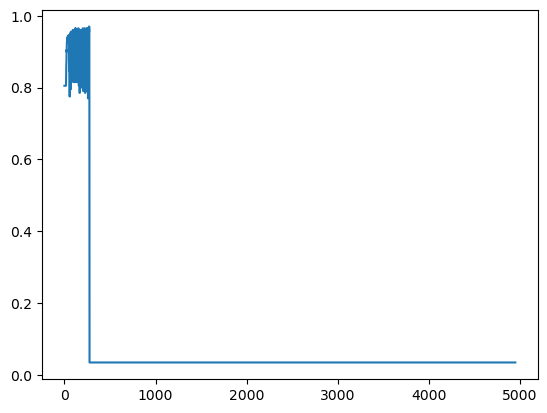

In [27]:
train_acc = data['train_acc']
num_line = len(train_acc[0])
x = numpy.arange(num_line)
for i in x[:1]:
    y = numpy.array(train_acc[i])
    plt.plot(x, y)

plt.show()